In [ ]:
import tensorflow 
from tensorflow import keras

from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),  (imagens_test, identificacoes_teste)) = dataset.load_data()
print(identificacoes_treino[3])


3


In [ ]:
device_name = tensorflow.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


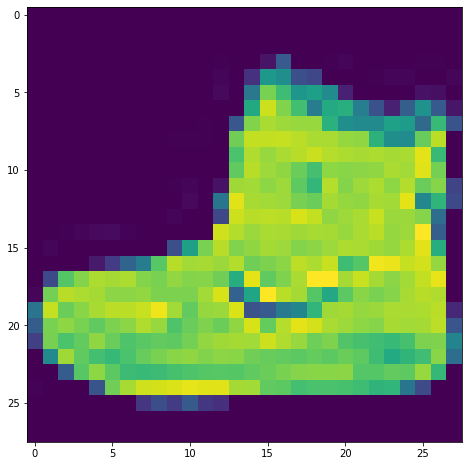

In [ ]:
plt.figure(figsize = (20,8))
plt.imshow(imagens_treino[0] )

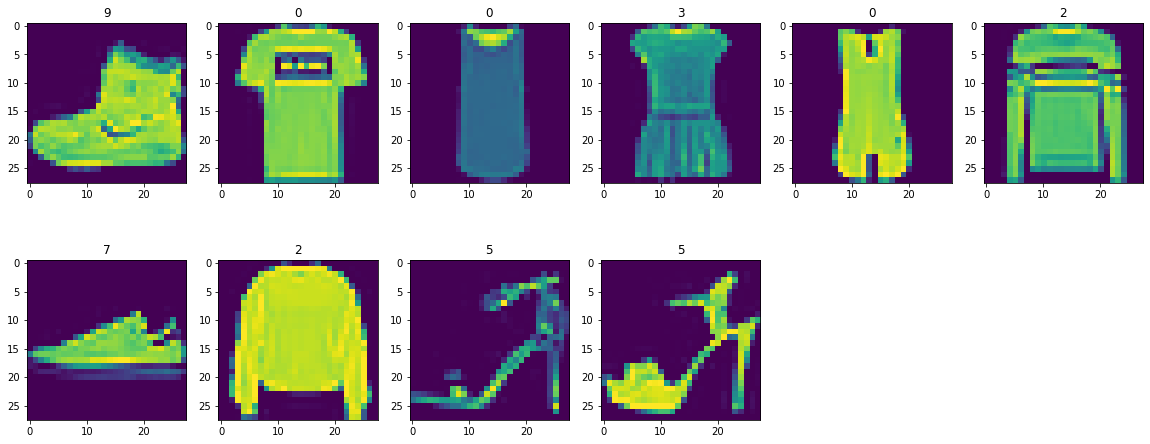

In [ ]:
total_de_classificacoes = 10
plt.figure(figsize = (20,8))
for imagem in range(10):
  plt.subplot(2, 6, imagem + 1)
  plt.imshow(imagens_treino[imagem])
  plt.title(identificacoes_treino[imagem])


In [ ]:
inputs = keras.Input(shape=(28, 28, 1))                           
x = layers.Rescaling(1./255)(inputs)                              
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)

outputs = layers.Dense(10, activation="softmax")(x)
modelo = keras.Model(inputs=inputs, outputs=outputs)


modelo.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'])



In [ ]:
history = modelo.fit(imagens_treino, identificacoes_treino, epochs =10 , validation_split = 0.2)

Epoch 1/10
1500/1500 [==============================] - 22s 5ms/step - loss: 0.4042 - accuracy: 0.8544 - val_loss: 0.2992 - val_accuracy: 0.8940
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2610 - accuracy: 0.9072 - val_loss: 0.2762 - val_accuracy: 0.9027
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2043 - accuracy: 0.9252 - val_loss: 0.2430 - val_accuracy: 0.9151
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1611 - accuracy: 0.9408 - val_loss: 0.2511 - val_accuracy: 0.9155
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1255 - accuracy: 0.9544 - val_loss: 0.2610 - val_accuracy: 0.9119
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0947 - accuracy: 0.9655 - val_loss: 0.3097 - val_accuracy: 0.9092
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0728 - accuracy: 0.9737 - val_loss: 0.3525 - val_accuracy

In [ ]:
testes = modelo.predict(imagens_test)
np.argmax(testes[0])

9

In [ ]:
modelo.evaluate(imagens_test, identificacoes_teste)

313/313 [==============================] - 1s 3ms/step - loss: 0.4761 - accuracy: 0.9053


[0.47605618834495544, 0.9053000211715698]

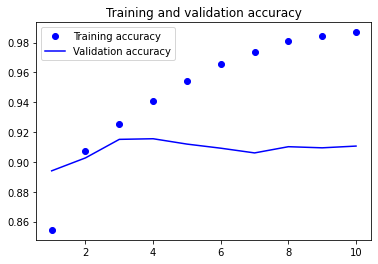

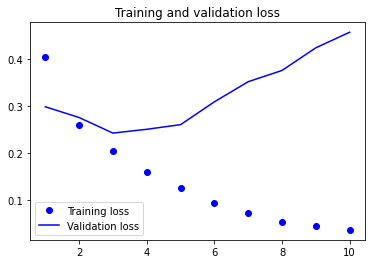

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')